TURN TO ENGLISH

# Projet : Réimplémentation et Amélioration de l'algorithme RLT (Reinforcement Learning Trees)

**Objectif :** Ce notebook structure le projet de réimplémentation en Python de l'algorithme RLT.

**Auteurs :** Kousay Najar, Hamza Farhani, Taoufik Krid, Wiem Ben M'Sahel, Rawen Mezzi, Mohamed Khayat

**Date :** 11/2025

## Phase 1 : Compréhension du Métier (Business Understanding)

Cette phase a pour but de définir les objectifs du point de vue du métier et de les traduire en un problème de data science bien défini.

# Problem statement, etude de l'existant et limitations, definir strategie

### 1.1 Objectifs Métier (Business Objectives - BOs)
Les BOs décrivent la valeur ajoutée attendue d'un point de vue non technique.

- **BO1 :  Reimplementer la strategie.** definire strategie (RLT)

- **BO 2 : Comparer les solutions classiques et notre solution.** 

- **BO3 : Rendre les décisions de la strategie explicables .** 

- **BO4 : Optimiser la strategie.**

### 1.2 Objectifs Data Science (Data Science Objectives - DSOs)
Les DSOs sont les objectifs techniques qui, une fois atteints, permettront de réaliser les BOs.

- **DSO1 : Implémenter l'algorithme Reinforcement Learning Trees (RLT).** 

- **DSO2 : Effectuer une etude comparative entre le modele RLT et les methodes classiques.** 

- **DSO3 : Expliquer les predictions du modele en utilisant les methodes XAI.** 

- **DSO4 : Optimiser le modele RLT.**

## Phase 2 : Compréhension des Données (Data Understanding)


In [ ]:
%pip install ucimlrepo


Number of Lignes is : 569


Number of Columns is : 31


Qualitatives Columns are : 


Quantatatives Columns are : 
radius1
texture1
perimeter1
area1
smoothness1
compactness1
concavity1
concave_points1
symmetry1
fractal_dimension1
radius2
texture2
perimeter2
area2
smoothness2
compactness2
concavity2
concave_points2
symmetry2
fractal_dimension2
radius3
texture3
perimeter3
area3
smoothness3
compactness3
concavity3
concave_points3
symmetry3
fractal_dimension3

The Target is : Diagnosis


No missing values


No duplicated values


Outliers detected in the following 29 features: ['radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1', 'compactness1', 'concavity1', 'concave_points1', 'symmetry1', 'fractal_dimension1', 'radius2', 'texture2', 'perimeter2', 'area2', 'smoothness2', 'compactness2', 'concavity2', 'concave_points2', 'symmetry2', 'fractal_dimension2', 'radius3', 'texture3', 'perimeter3', 'area3', 'smoothness3', 'compactness3', 'concavity3', 'symmetry3', 'fractal_dimension3']


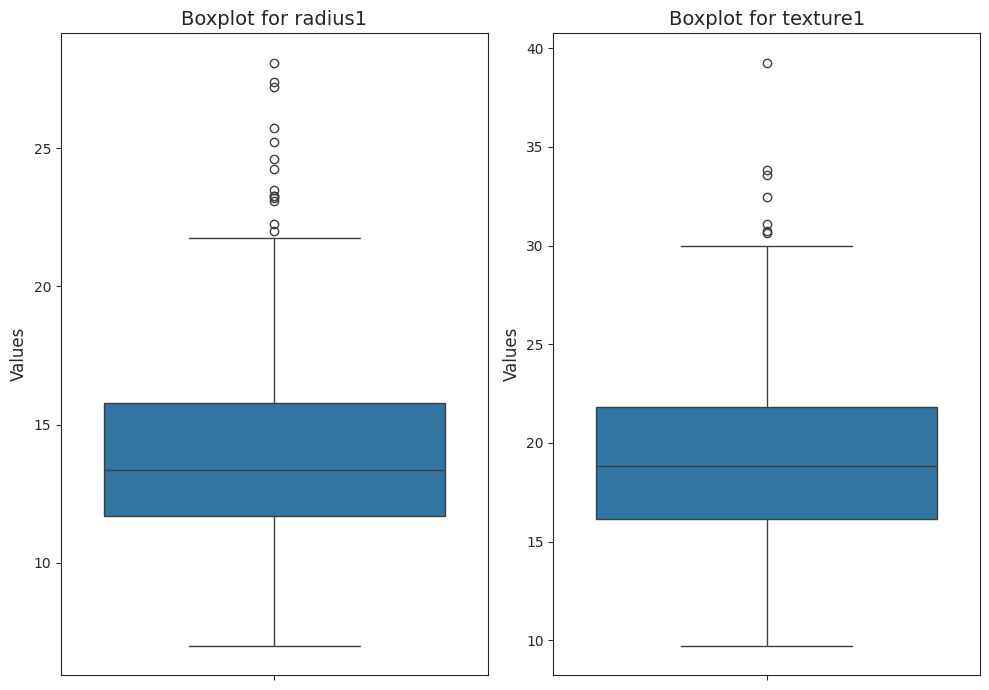

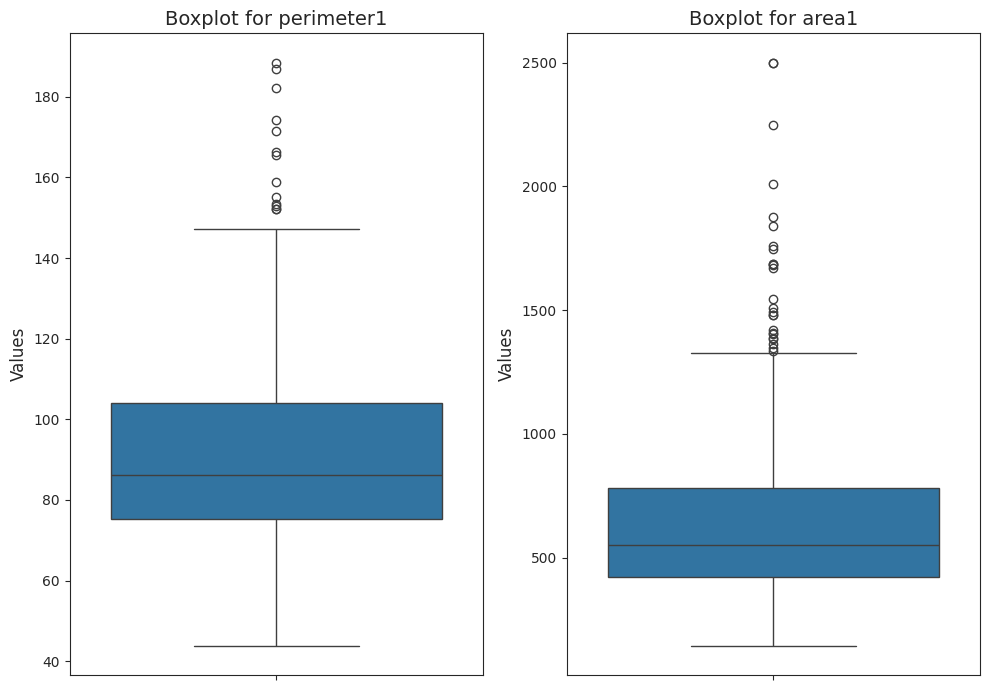

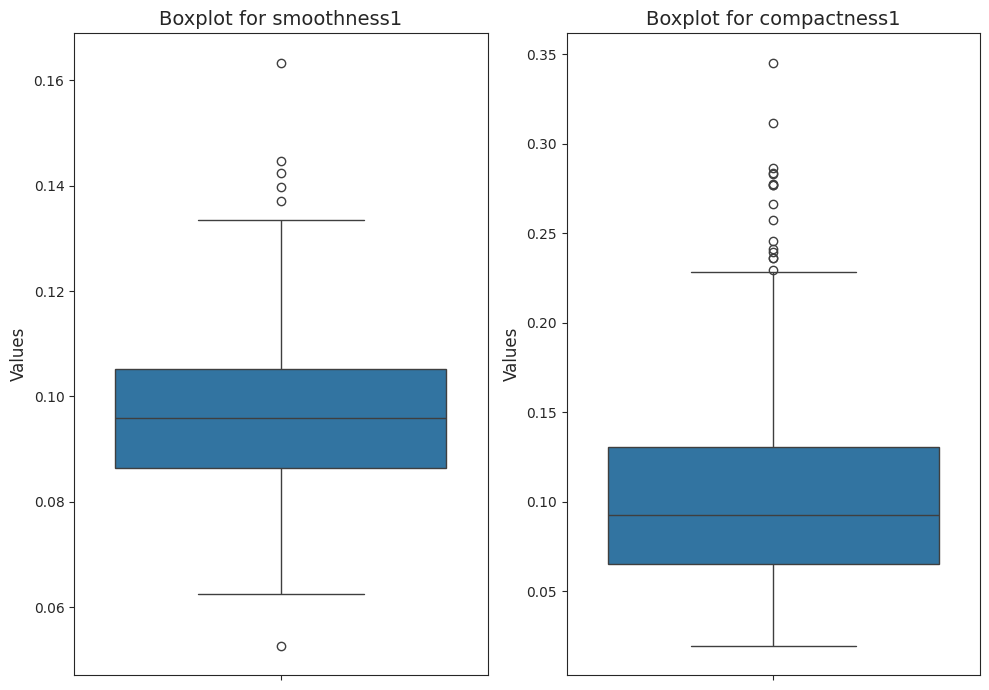

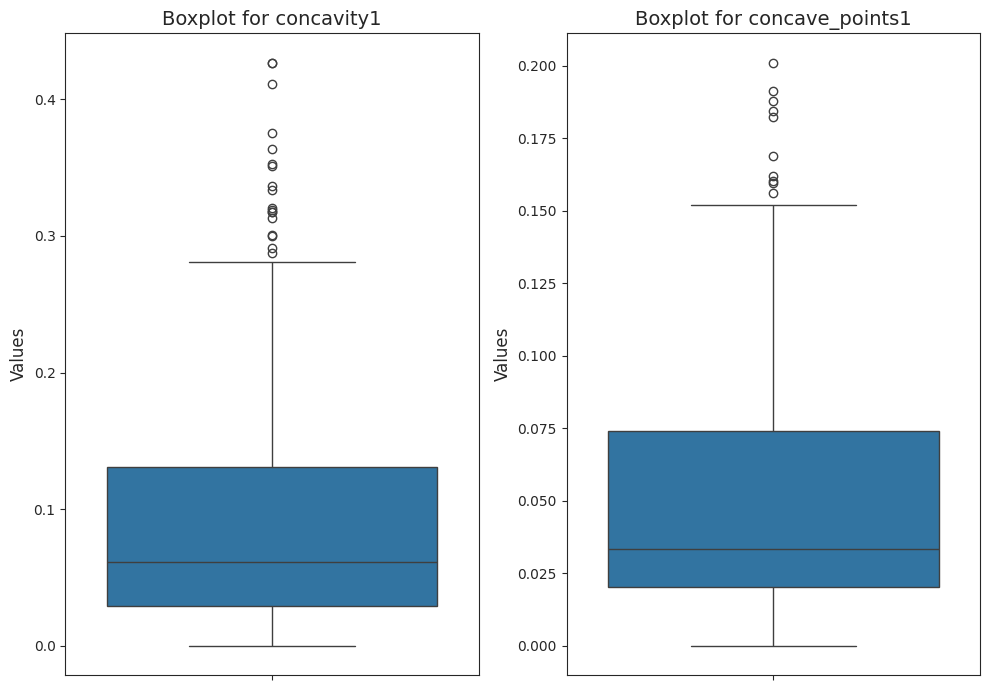

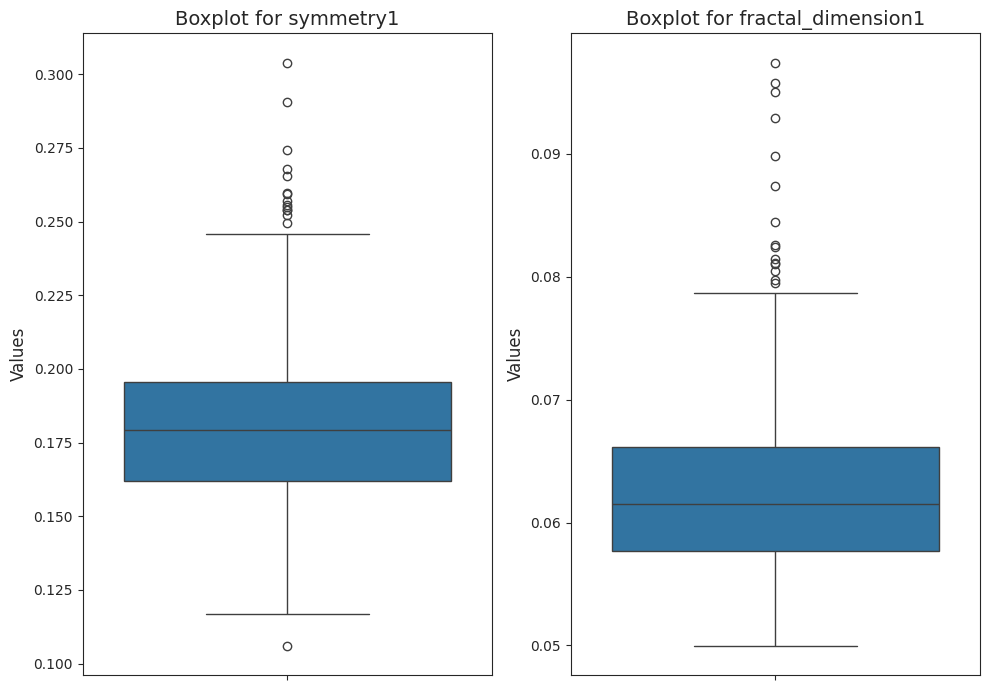

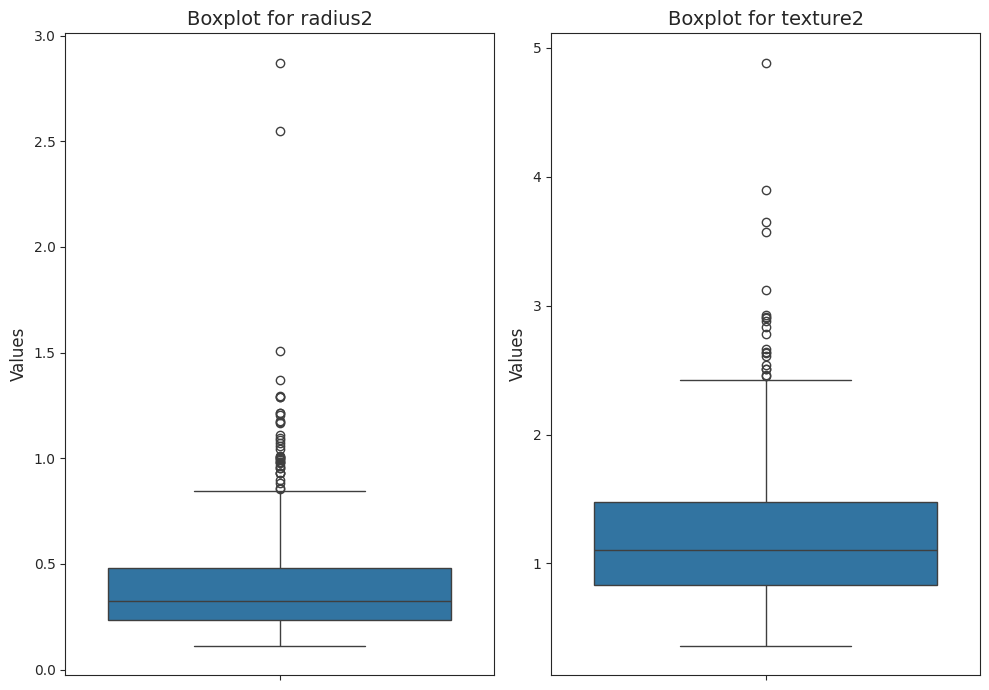

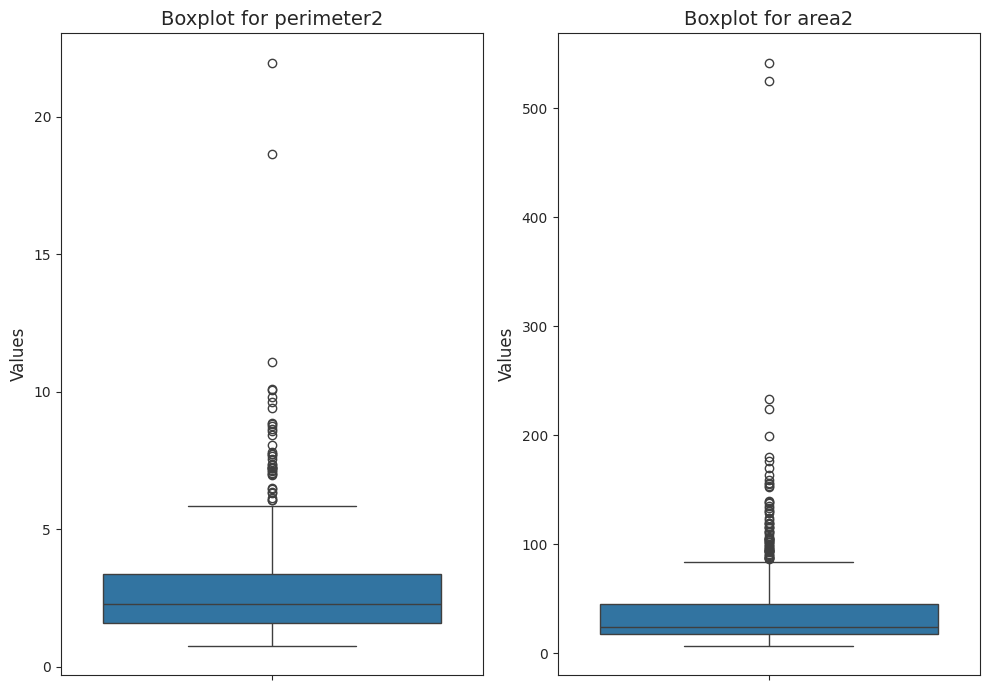

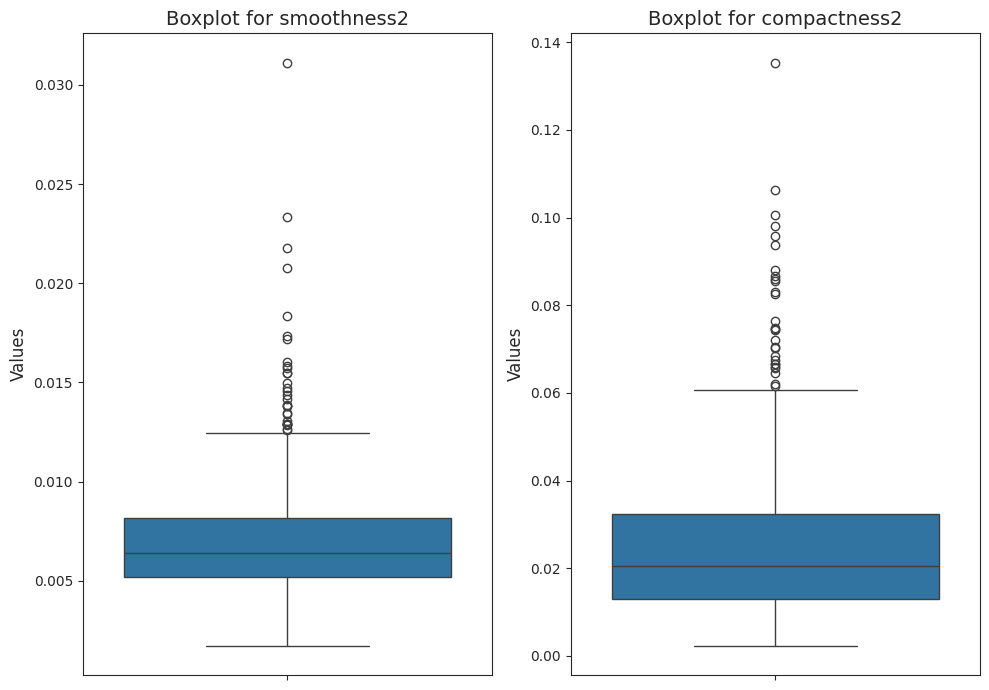

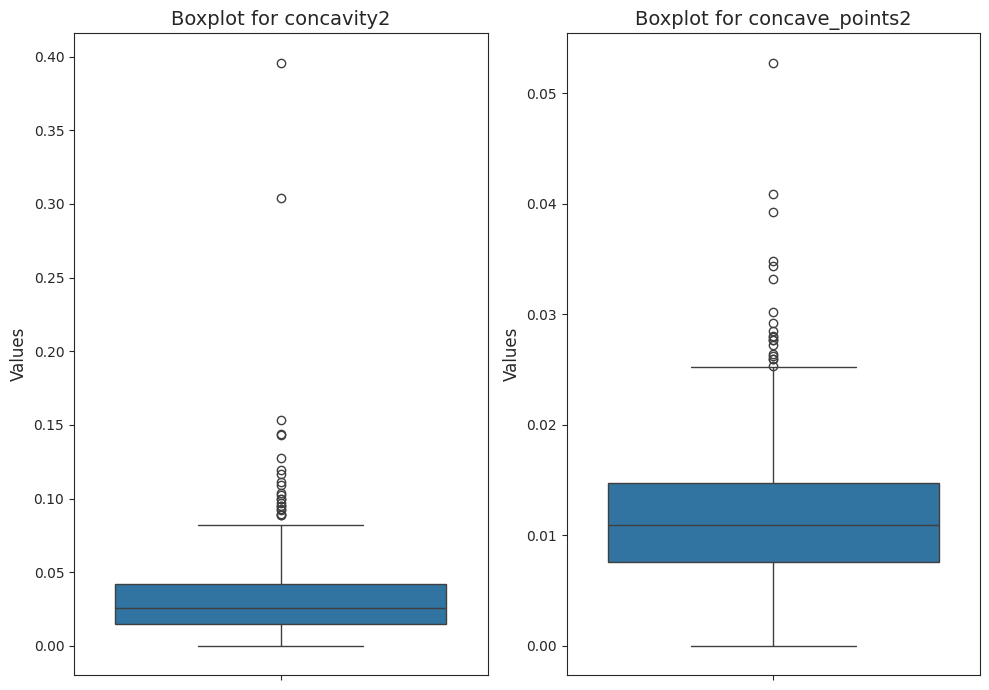

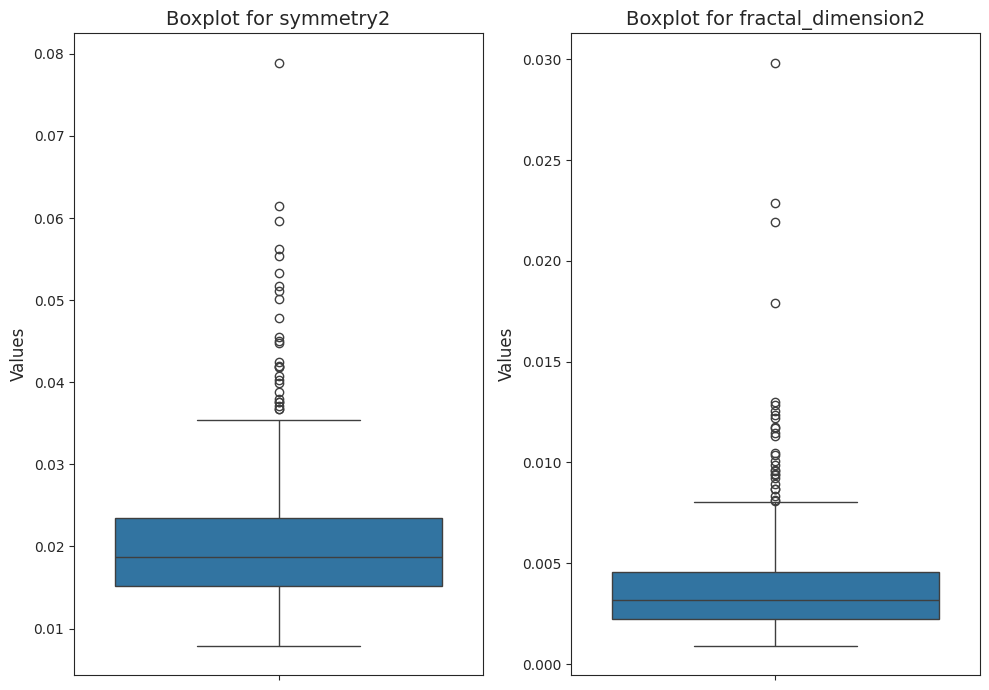

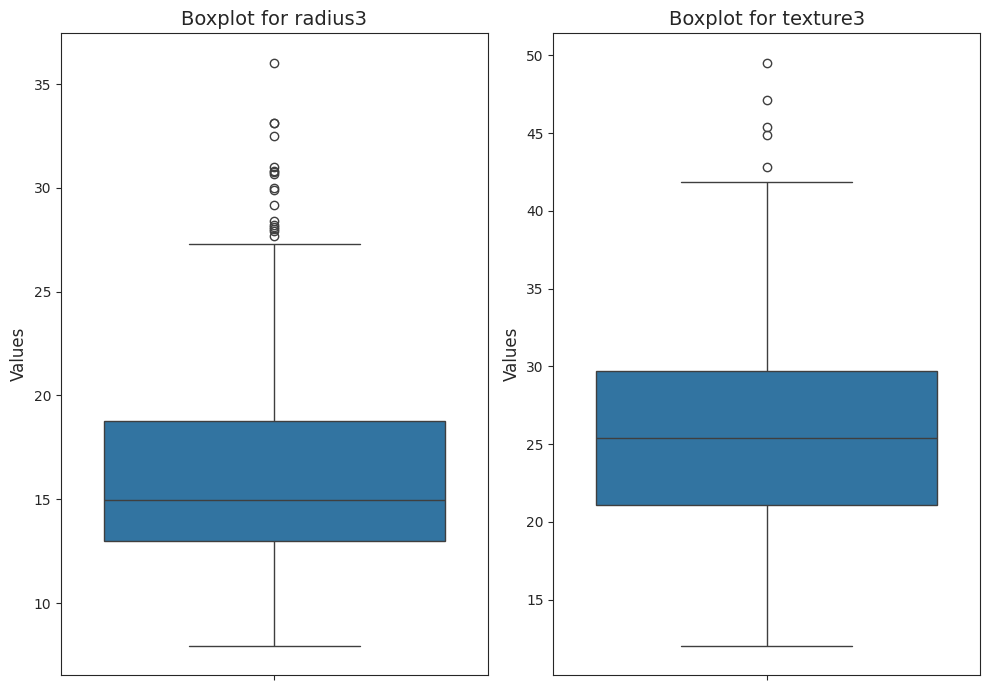

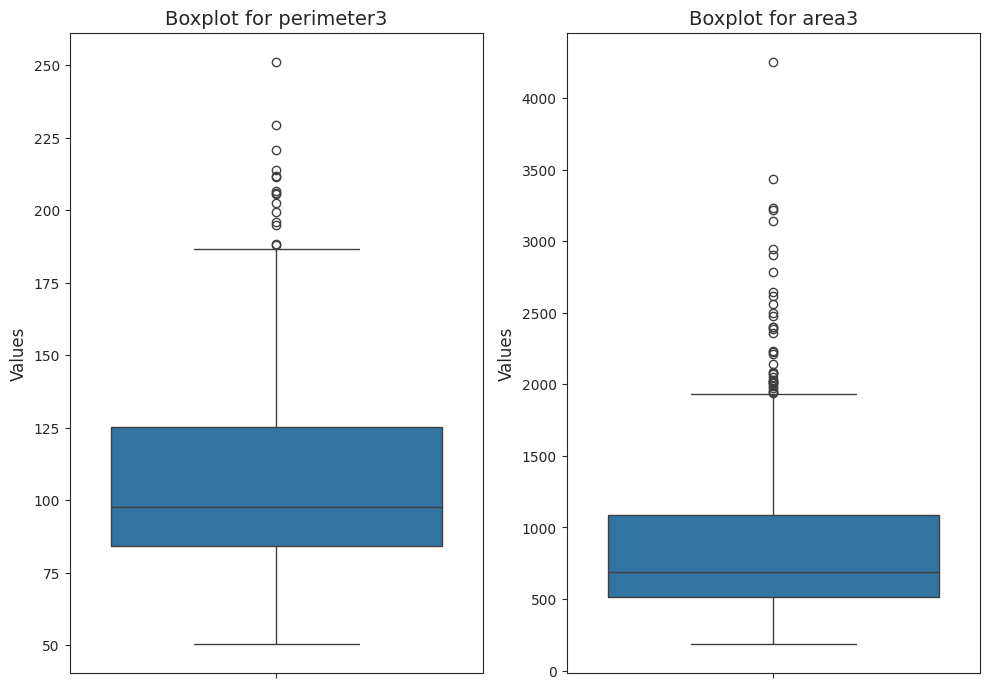

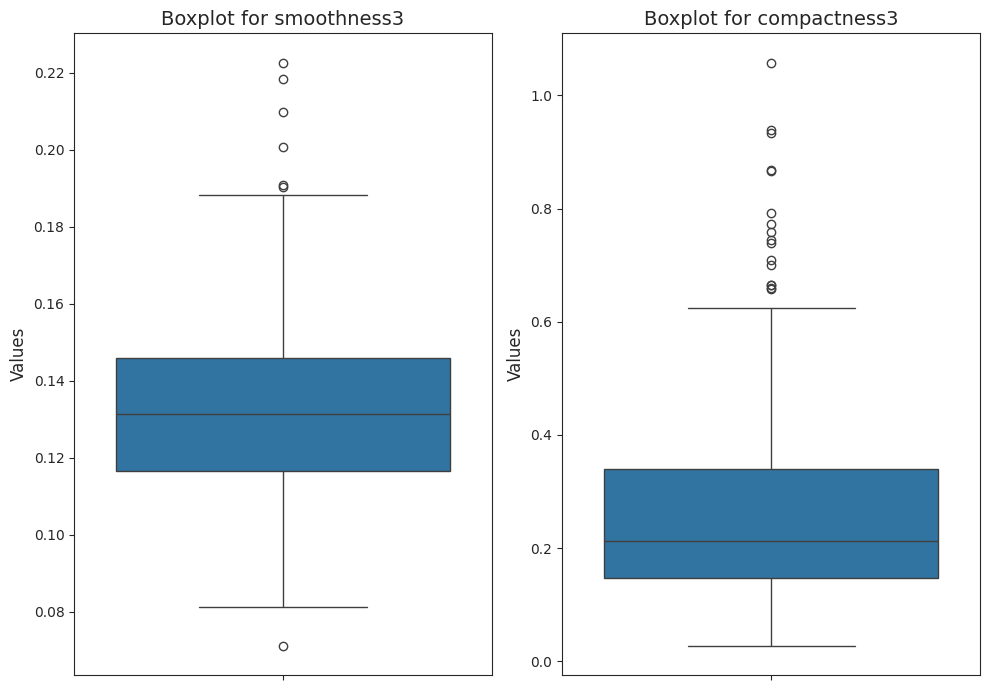

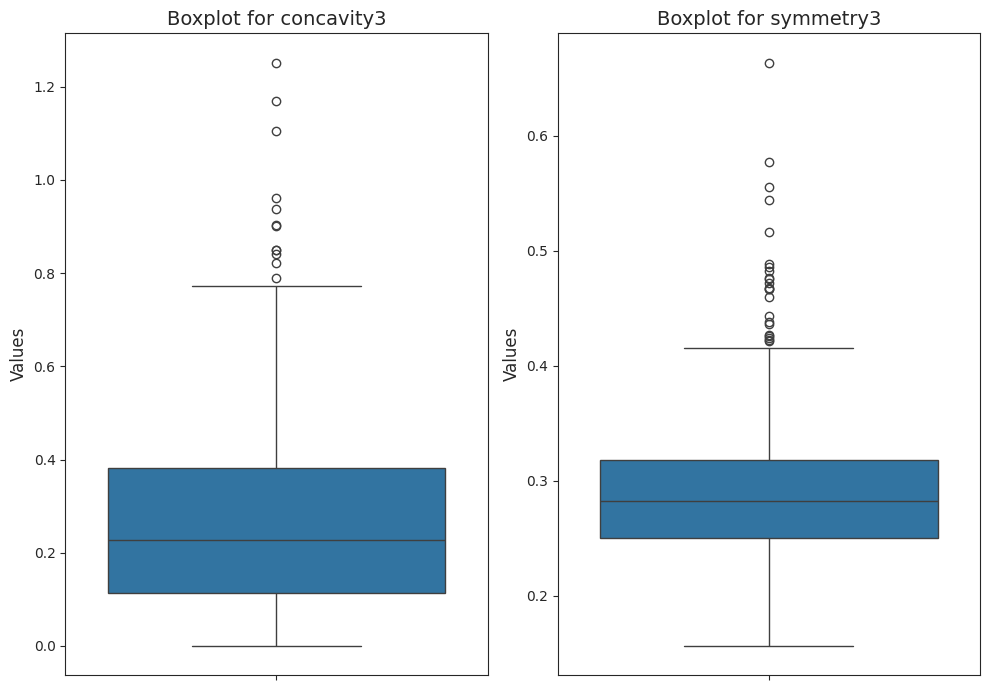

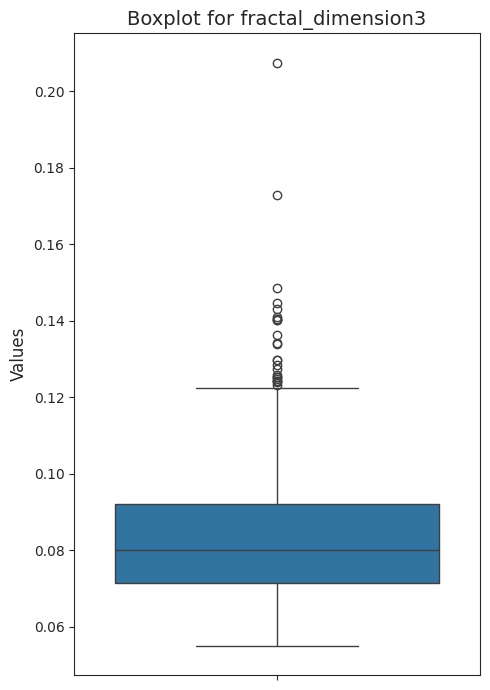


Histplots for features



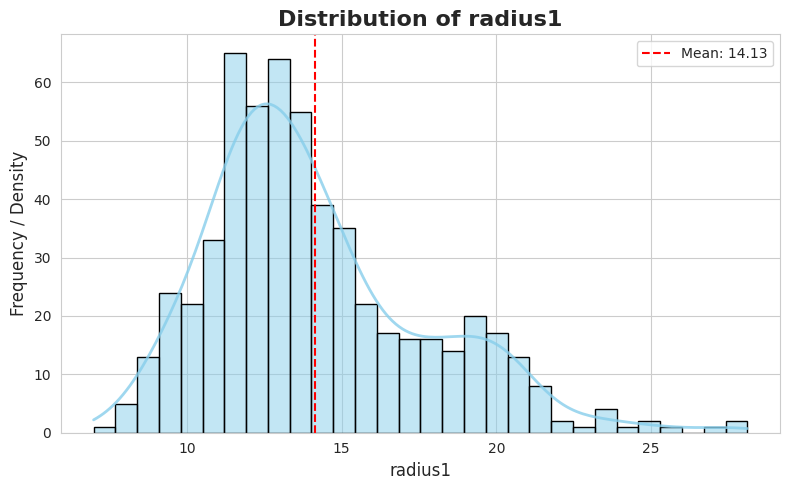

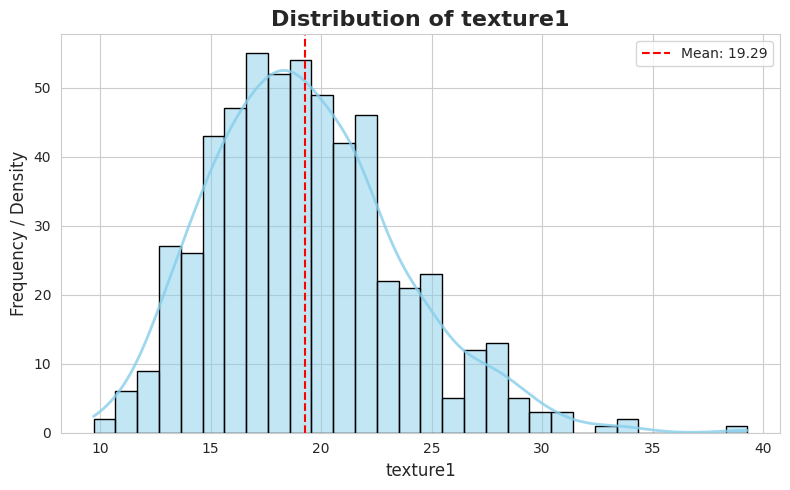

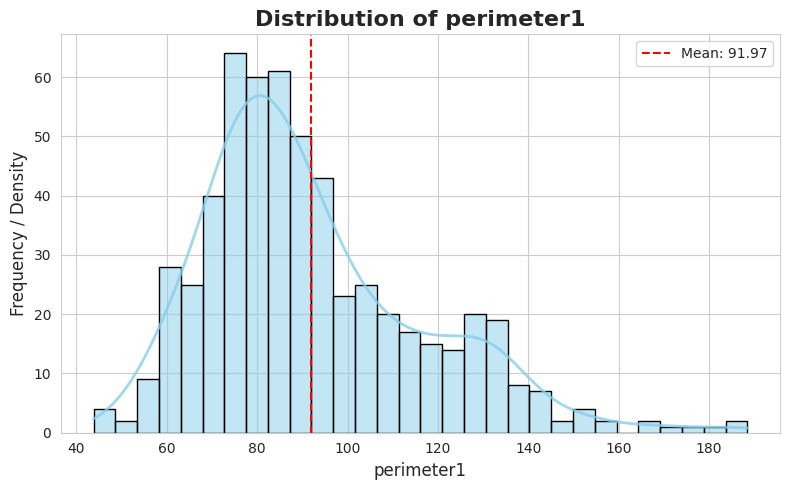

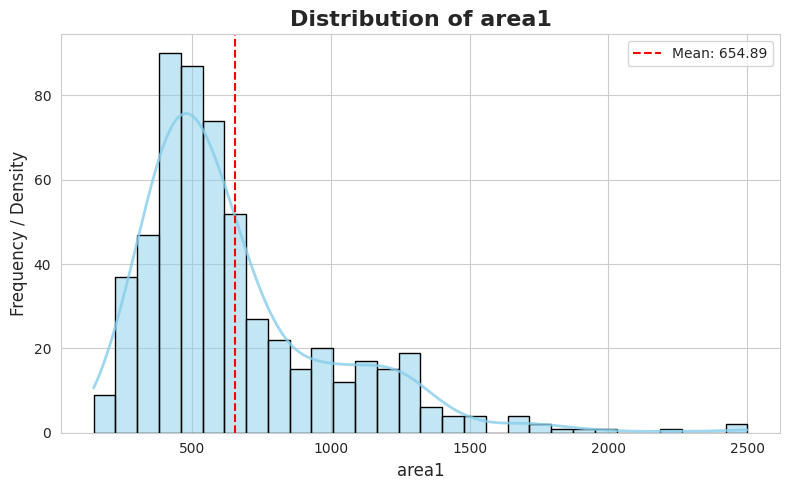

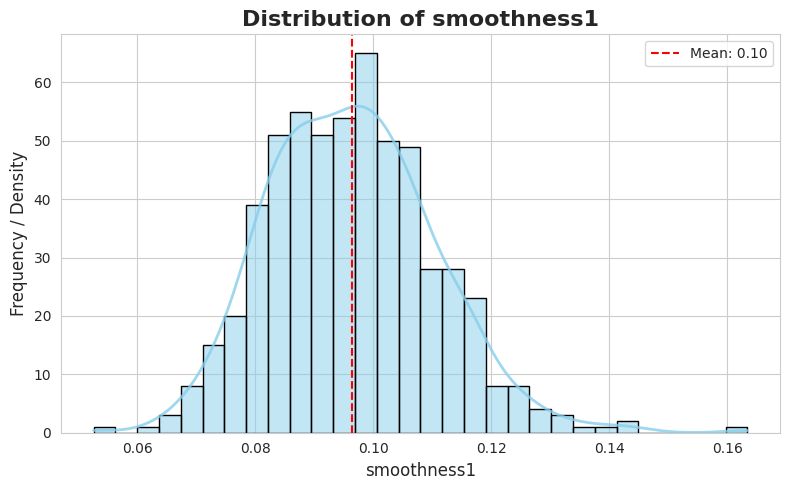

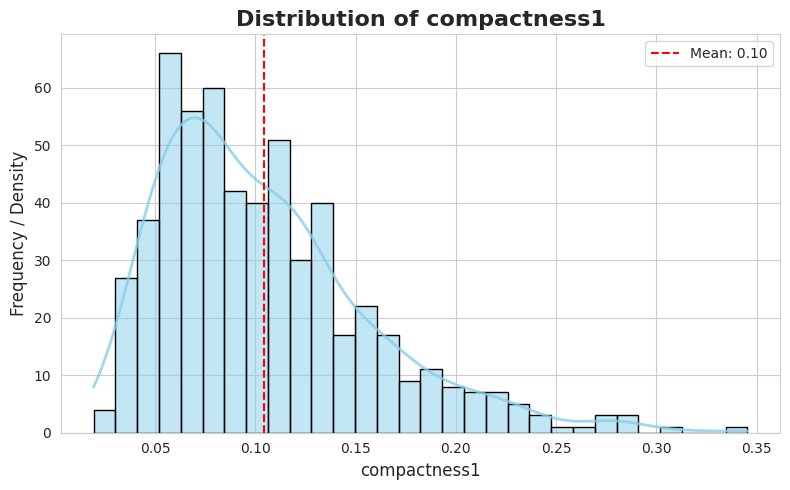

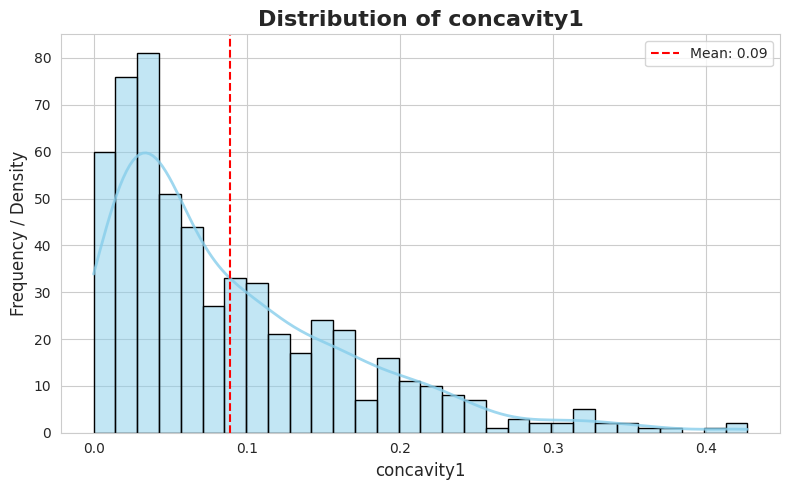

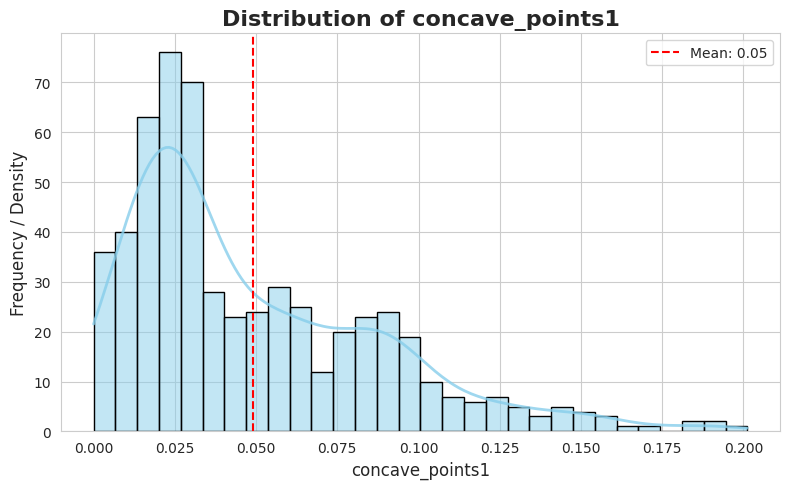

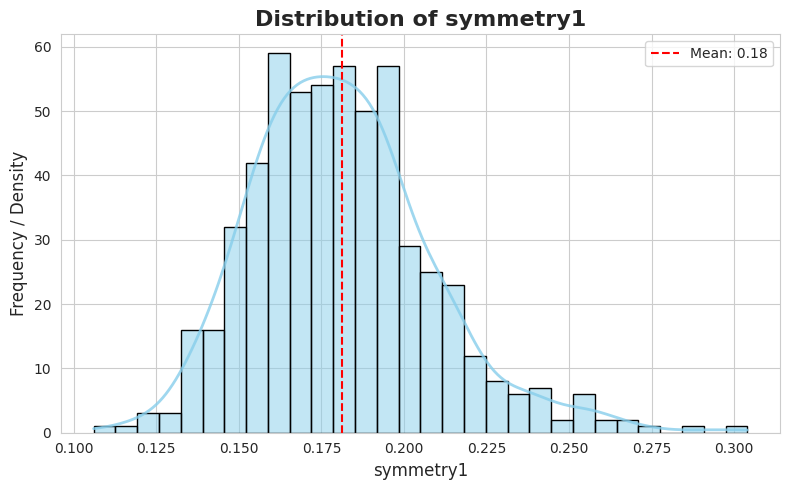

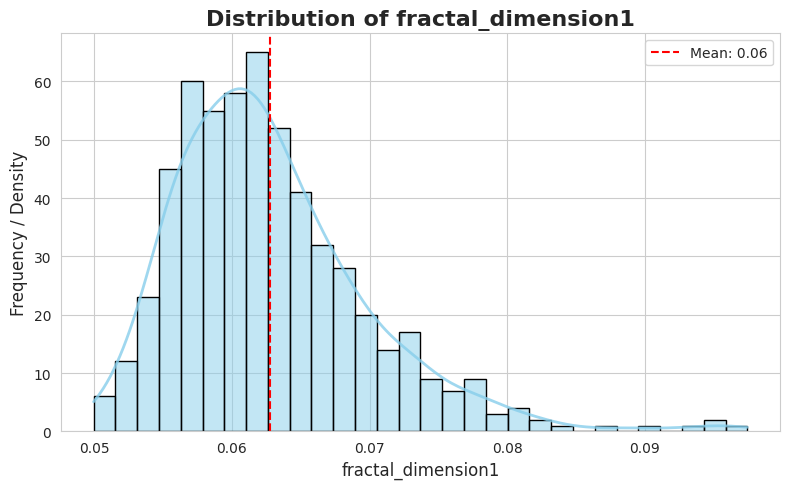

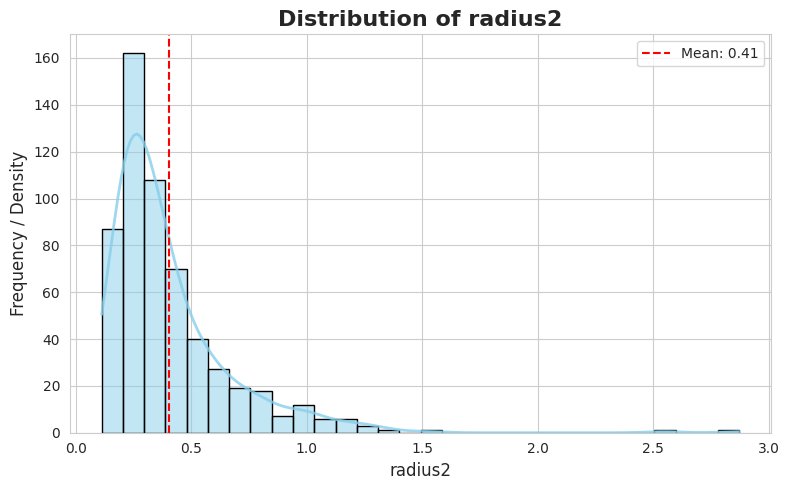

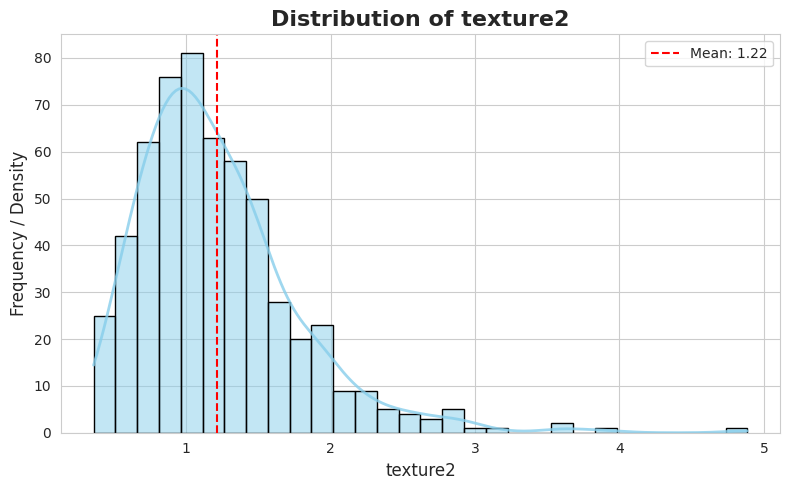

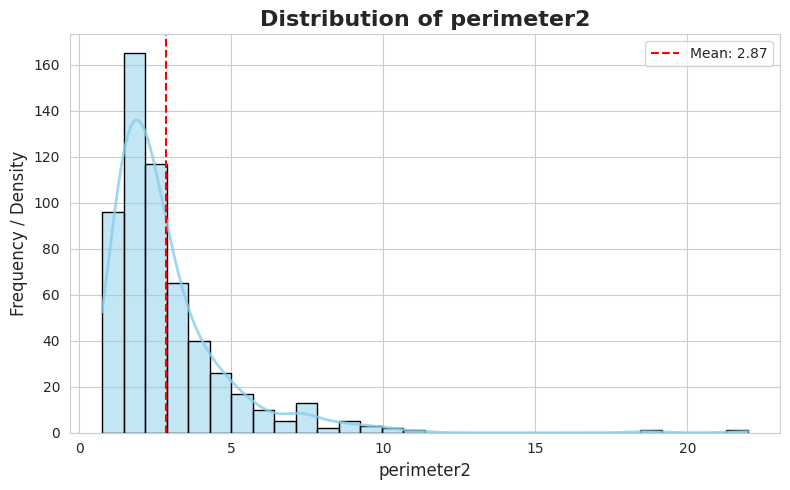

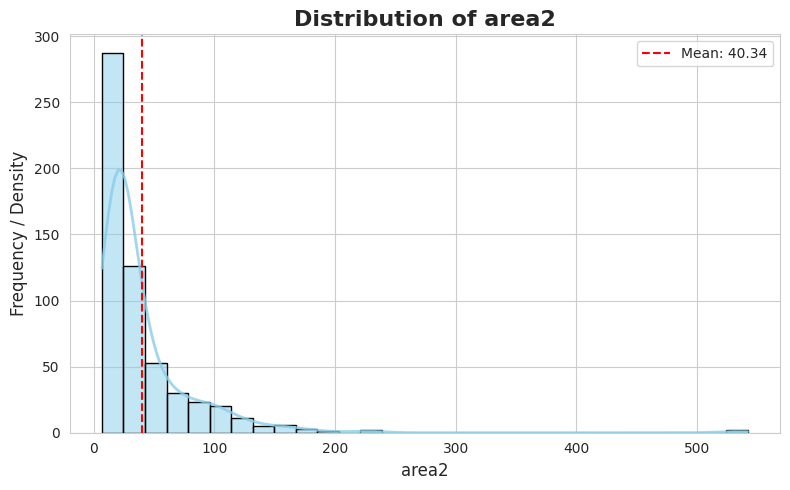

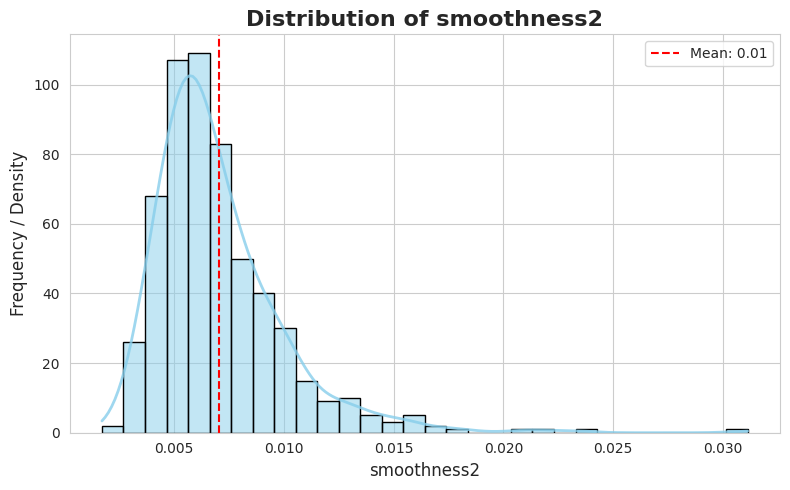

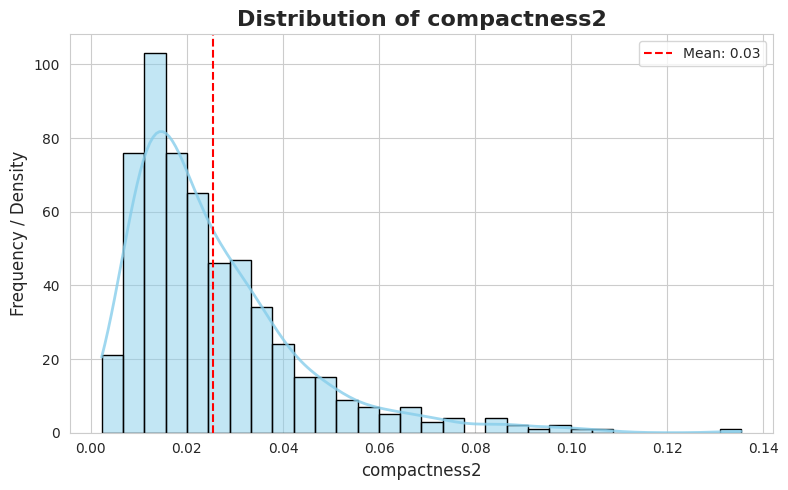

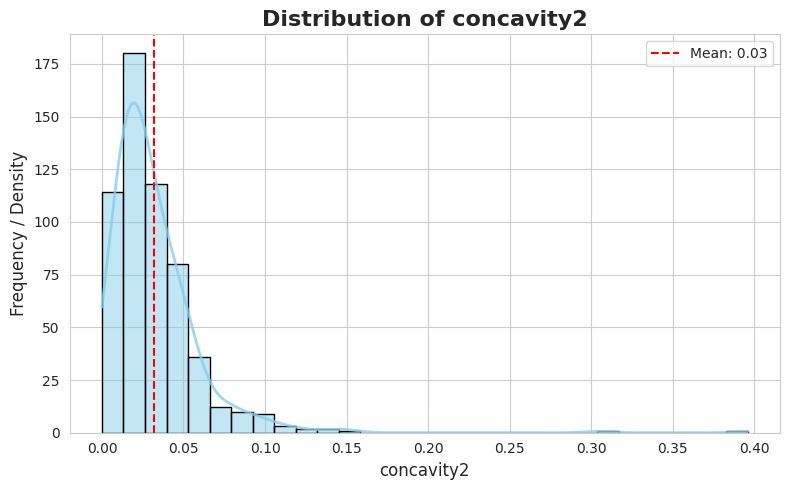

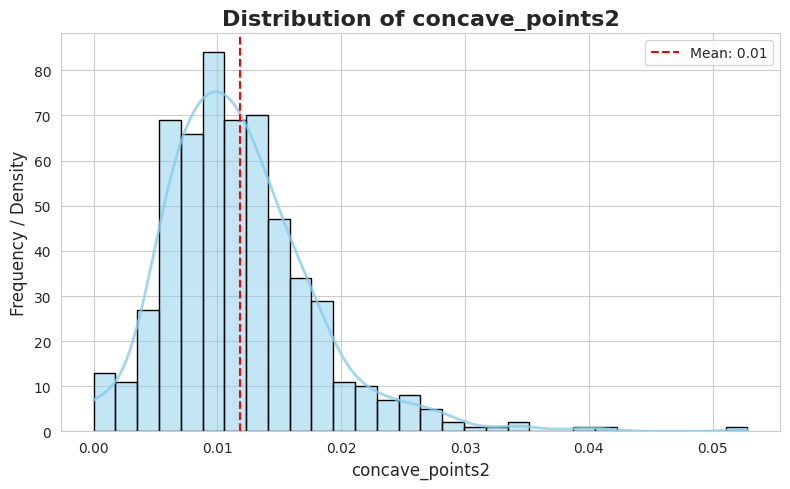

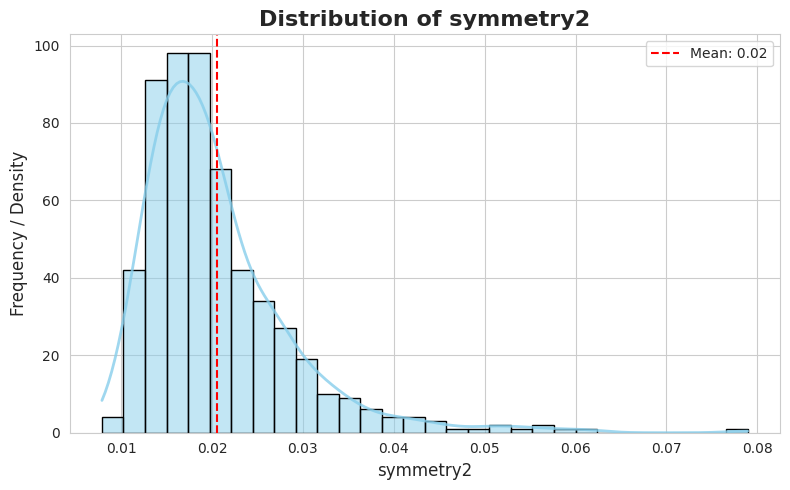

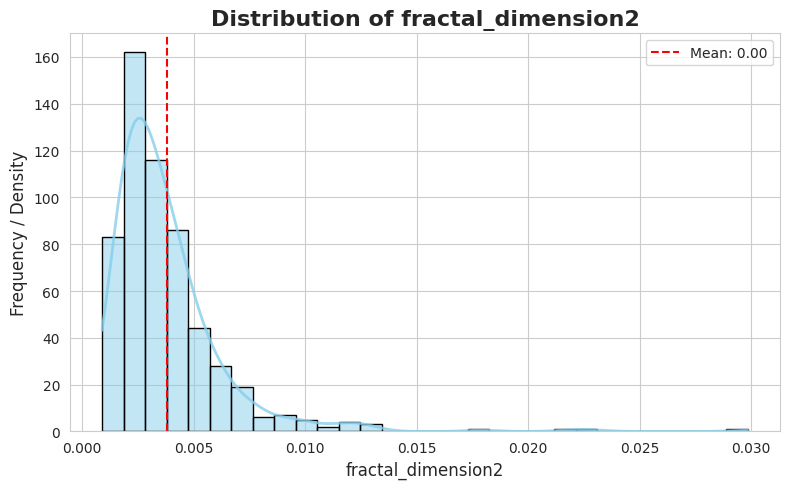

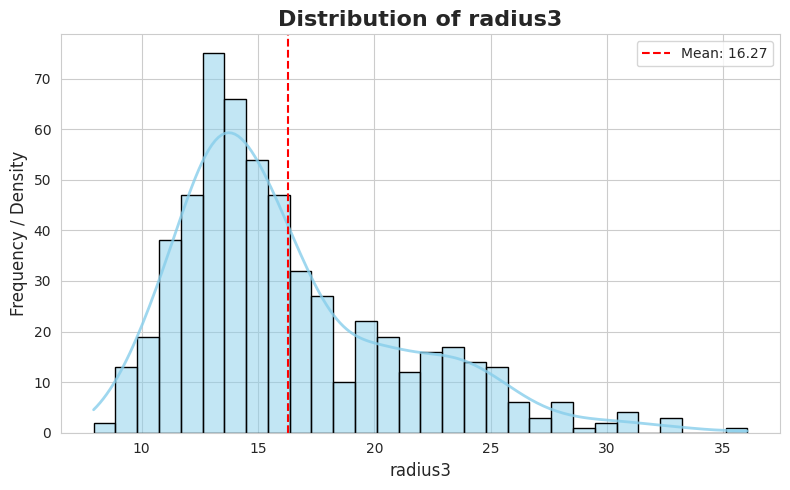

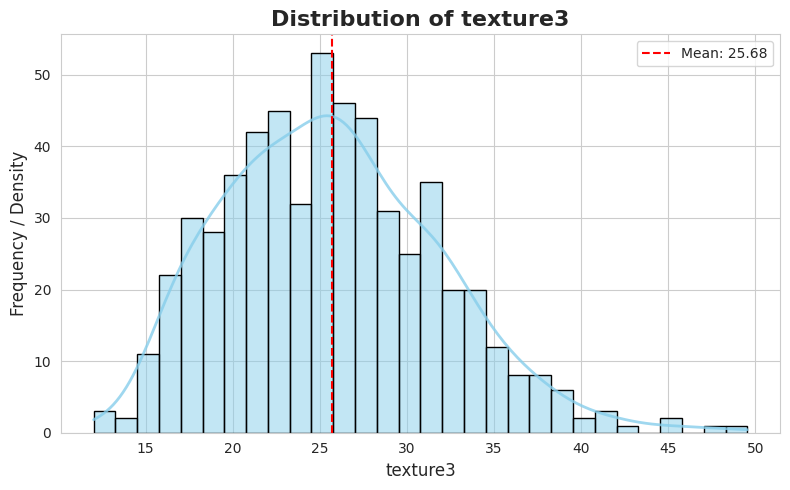

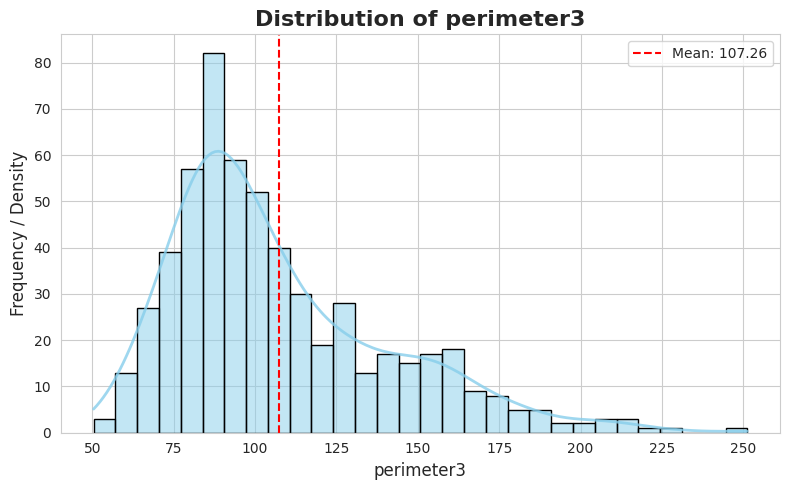

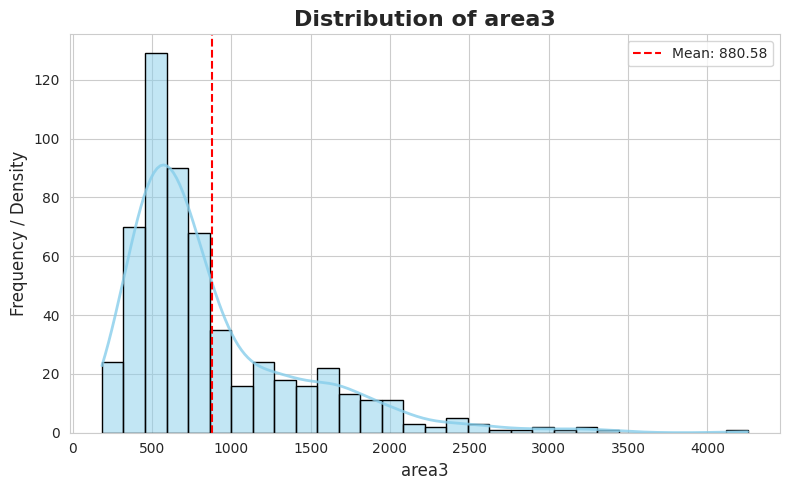

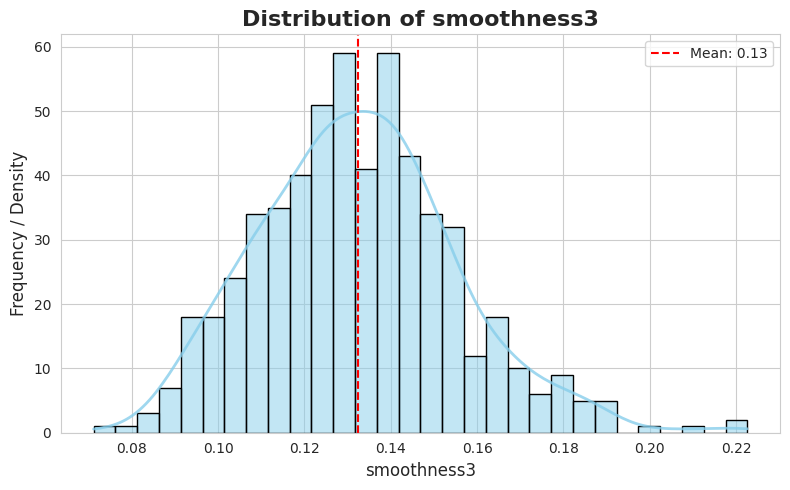

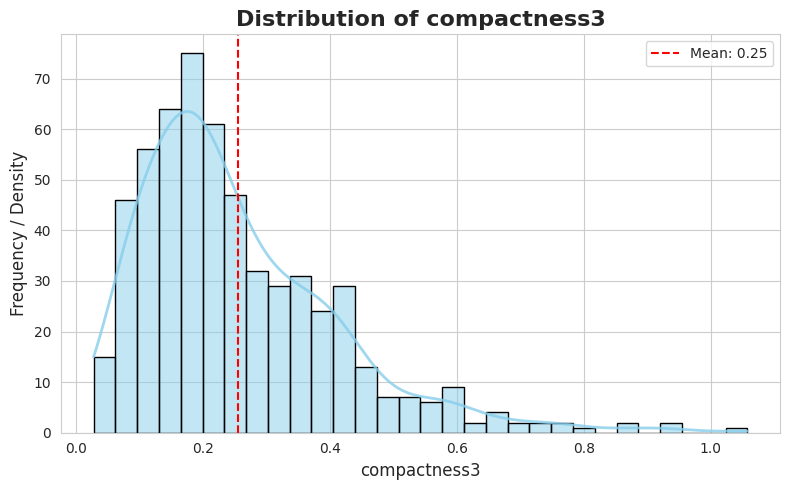

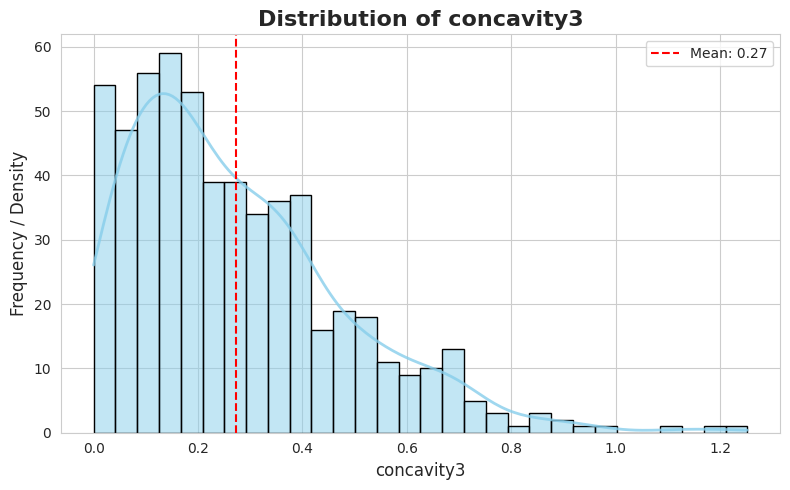

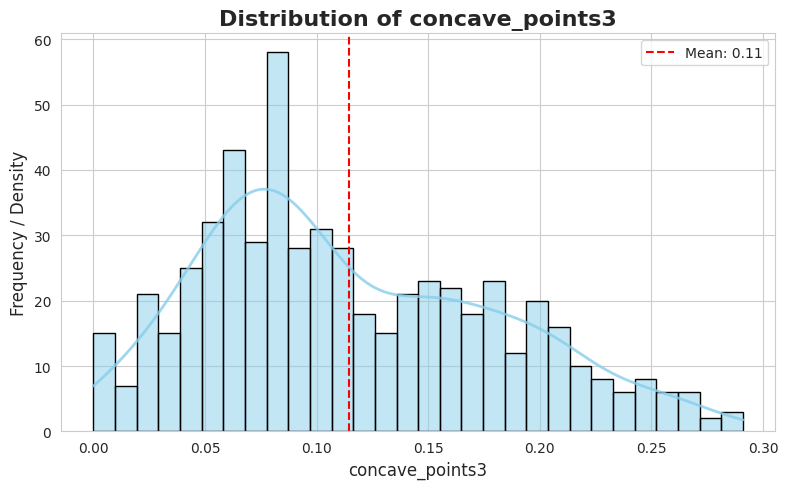

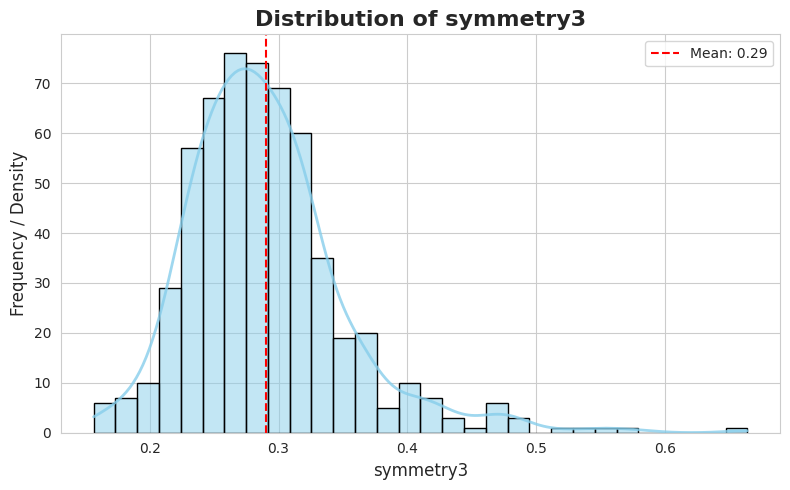

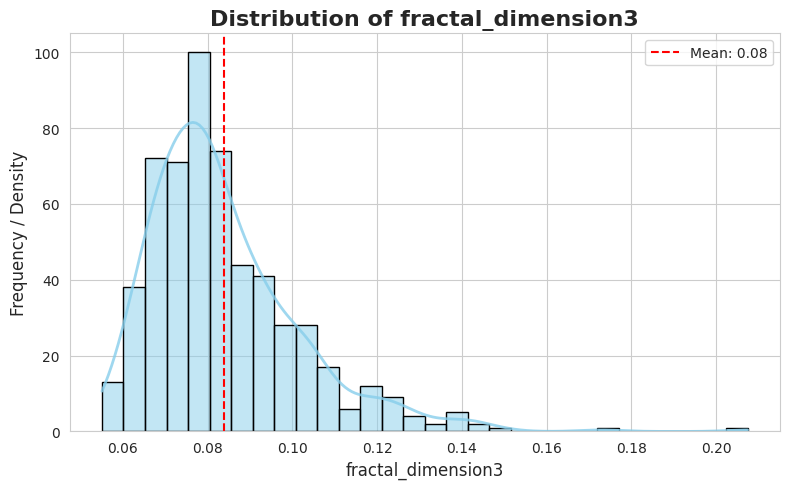


Countplot for Target



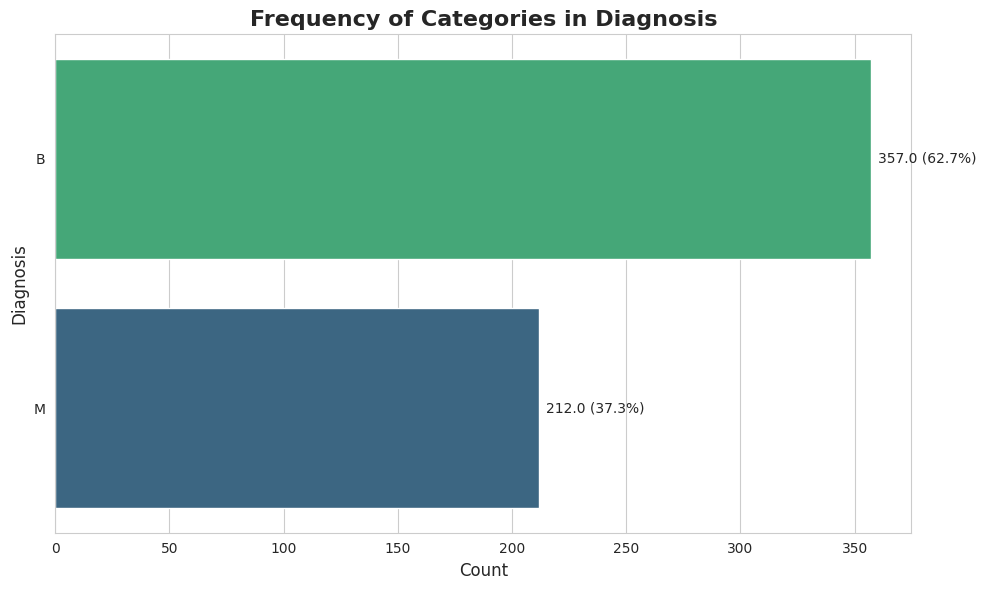


Note: Dataset has 30 quantitative features. Plotting a subset of the first 10 for Pair Plot readability.
Generating Pair Plot for 10 features...


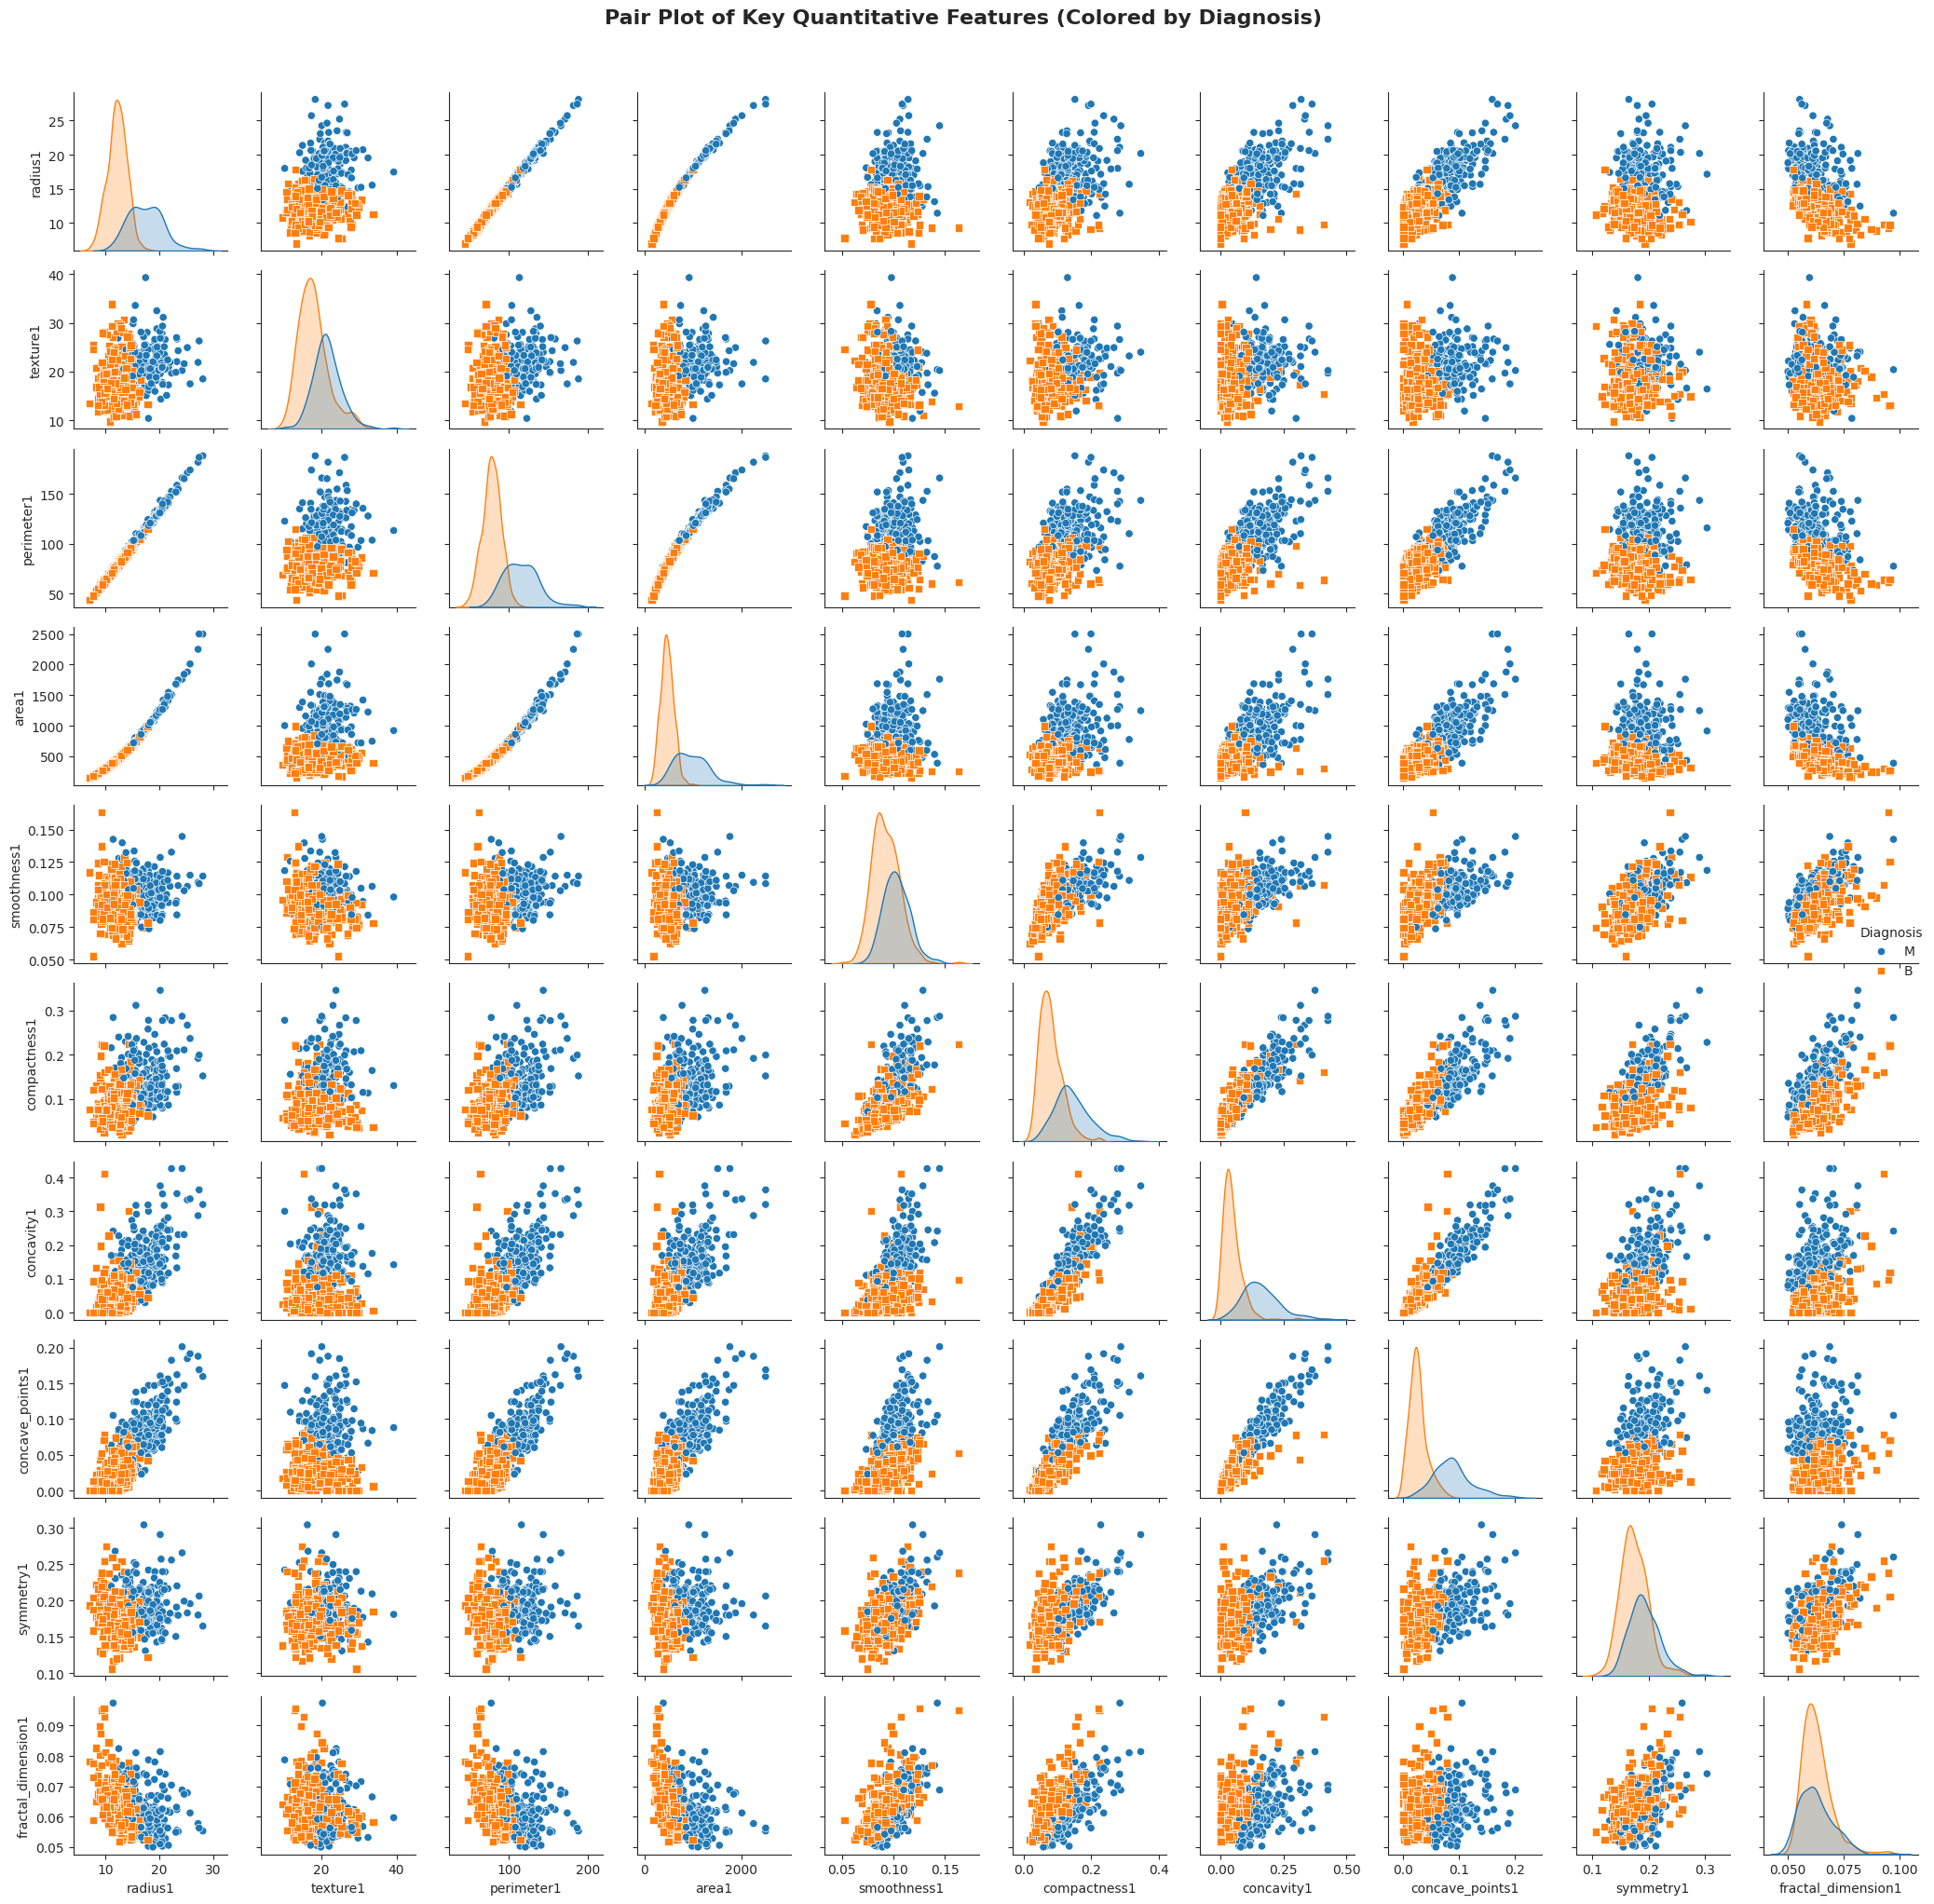

In [66]:
import scripts.data_understanding as data_understanding
import importlib
importlib.reload(data_understanding)
qual_variables, quant_variables, target_variable = data_understanding.understand_data("breast_cancer")

In [58]:
qual_variables

[]

In [12]:
quant_variables

['radius1',
 'texture1',
 'perimeter1',
 'area1',
 'smoothness1',
 'compactness1',
 'concavity1',
 'concave_points1',
 'symmetry1',
 'fractal_dimension1',
 'radius2',
 'texture2',
 'perimeter2',
 'area2',
 'smoothness2',
 'compactness2',
 'concavity2',
 'concave_points2',
 'symmetry2',
 'fractal_dimension2',
 'radius3',
 'texture3',
 'perimeter3',
 'area3',
 'smoothness3',
 'compactness3',
 'concavity3',
 'concave_points3',
 'symmetry3',
 'fractal_dimension3']

In [13]:
target_variable

'Diagnosis'

## Phase 3 : Préparation des Données (Data Preparation)

La préparation consistera principalement à diviser nos jeux de données synthétiques.

## Phase 4 : Modélisation (Modeling)

Cette phase est le cœur du projet. Nous implémentons RLT et ajoutons les extensions requises par DSO2 (modèles embarqués variés) et DSO3 (explicabilité).

# BO 1 : data simulées 
# BO 2 : datak ol
# BO 3 : qlq exemples 
# BO 4 : data kol

### DSO1: Re-implementing the Strategy (RLT)

**Objective:** To build and validate the RLT model by reproducing the paper's experiments on the four controlled, simulated scenarios.

| Model | Dataset(s) for Development | Variables Involved | Key Parameters / Hyperparameters to Implement |
| :--- | :--- | :--- | :--- |
| **RLT (Reinforcement Learning Trees)** | **Simulated Scenarios 1-4** | **Data is programmatically generated for each scenario:**<br>- **Scenario 1 (Classification):** Signal from `X(1)` & `X(2)`; other `p-2` variables are independent noise.<br>- **Scenario 2 (Non-linear):** Non-linear signal from `X(1)` & `X(2)`; other `p-2` variables are independent noise.<br>- **Scenario 3 (Correlated):** Interaction signal from `X(50)`, `X(100)`, `X(150)`, `X(200)`; other variables are strongly correlated noise.<br>- **Scenario 4 (Linear):** Linear signal from `X(50)`, `X(100)`, `X(150)`; other variables are correlated noise.<br><br>*For all scenarios, total dimension `p` is tested at 200, 500, and 1000.* | - `M` (number of trees) = 100<br>- `nmin` = n^(¹/³)<br>- **Embedded model logic** (Extremely Randomized Trees)<br>- **Muting mechanism** (0%, 50%, 80%)<br>- **Linear combination `k` mechanism** (for k=1, 2, 5) |

### DSO2: Comparing Classical Solutions with Our Solution

**Objective:** To conduct a rigorous benchmark on all 10 real-world datasets, comparing the performance and computational efficiency of the re-implemented RLT against standard, high-performing tree-based models.

| Model | Dataset(s) for Comparison | Variables Involved | Hyperparameter Search Space | Execution Time |
| :--- | :--- | :--- | :--- | :--- |
| **RLT (Our Solution)** | **All 10 real datasets** | **For each dataset:**<br>1. Select numeric features only.<br>2. Standardize them (mean=0, var=1).<br>3. Add noisy covariates to reach a total of **p=500** features. | - `k` (linear combination size) in<br>- `muting_rate` in [0, 0.5, 0.8]<br>- `nmin` set to n¹/³ | **Measure and compare:**<br>1. Total training time.<br>2. Prediction time on the test set.<br>|
| **Random Forests (RF)** | All 10 real datasets | *Identical data pipeline as RLT* | - `ntrees` in<br>- `mtry` (features per split) in [√p, p/3, p]<br>- `nodesize` (min leaf size) in [2, n¹/³] | **Measure and compare:**<br>1. Total training time.<br>2. Prediction time on the test set.<br>|
| **Gradient Boosting (GBM)** | All 10 real datasets | *Identical data pipeline as RLT* | - `ntrees` (boosting rounds) in (use early stopping)<br>- `learning_rate` in [0.01, 0.05, 0.1]<br>- `interaction.depth` in<br>- `n.minobsinnode` in [5, 10, n¹/³] | **Measure and compare:**<br>1. Total training time.<br>2. Prediction time on the test set.<br>|
| **XGBoost** | All 10 real datasets | *Identical data pipeline as RLT* | - `n_estimators` in (use early stopping)<br>- `learning_rate` in [0.01, 0.05, 0.1]<br>- `max_depth` in<br>- `subsample` in [0.7, 0.8, 0.9]<br>- `colsample_bytree` in [0.7, 0.8, 0.9] | **Measure and compare:**<br>1. Total training time.<br>2. Prediction time on the test set.<br>|

### DSO3: Making the Strategy's Decisions Explainable

**Objective:** To diagnose and understand the behavior of the RLT model by applying global and local explainability techniques, and comparing its decision-making process to that of a standard Random Forest.

| Model | Explainability Technique | Dataset(s) for Explainability | Goal of the Technique |
| :--- | :--- | :--- | :--- |
| **RLT** & **Random Forest (RF)** | **Global Feature Importance (VIM)** | **Choose 2 contrasting datasets:**<br>1. Where RLT excelled (e.g., `concrete`).<br>2. Where RLT was less dominant (e.g., `Boston housing`). | To identify which of the 500 features the model considers most predictive *overall*, across the entire dataset. |
| **RLT** | **LIME (Local Explanations)** | Same two datasets. | To explain *why the model made a specific prediction for a single instance (row)*, providing local, case-by-case insight. |

### DSO4: Proposing and Testing Our Own Improvement

**Objective:** To validate if our proposed modifications to the RLT algorithm yield a statistically significant improvement in performance or efficiency over the original implementation.

| Model | Dataset(s) for Testing | Variables Involved | Key Parameters / Hyperparameters to Test |
| :--- | :--- | :--- | :--- |
| **RLT (Baseline)** | **All 10 real datasets** | **Identical pipeline for both models:**<br>1. Select numeric features only.<br>2. Standardize them (mean=0, var=1).<br>3. Add noisy covariates to reach **p=500**. | **Original paper's configuration:**<br>- `k` in<br>- `muting_rate` in [0, 0.5, 0.8]<br>- `embedded_model` = 'ExtremelyRandomizedTrees' |
| **Improved RLT** | **All 10 real datasets** | *Identical data pipeline as the baseline for a fair comparison.* | **Test one or more proposed improvements:**<br>- **Idea 1:** Change `embedded_model` to 'LightGBM'.<br>- **Idea 2:** Change `muting_strategy` to 'adaptive_quantile'.<br>- **Idea 3:** Change `linear_combination_method` to 'ridge_weighted'.<br><br>*(All other parameters remain identical to the baseline)* |

## Phase 5 : Évaluation (Evaluation)

Nous validons ici les trois DSOs de manière distincte.

In [ ]:
# === Validation DSO1 : Reproduction RLT Standard ===
# Entraîner RLT (mode standard) sur 'Checkerboard' et comparer avec RandomForest sklearn.
# Critère : RLT doit avoir une accuracy significativement supérieure grâce au 'combsplit'.

# === Validation DSO2 : Benchmarking des Modèles Embarqués ===
# Comparer RLT_Standard (embedded='rf') vs RLT_Boosted (embedded='lightgbm').
# Mesurer : Temps d'entraînement et Précision/MSE sur les données bruitées.
# Critère : RLT_Boosted doit montrer un gain de performance ou de vitesse.

# === Validation DSO3 : Qualité de l'Explicabilité ===
# Utiliser .explain() sur le jeu de données bruité.
# Vérifier si la heatmap générée attribue une importance proche de 0 aux variables de bruit.
# Visualiser une 'Feature Heatmap' pour quelques prédictions.

## Phase 6 : Déploiement (Deployment)

Préparation du modèle pour l'intégration, en mettant l'accent sur l'explicabilité (BO3).

### 6.1 Sauvegarde du Modèle Optimisé
Sauvegarder la meilleure version du modèle (probablement celle issue de DSO2).

### 6.2 Interface Streamlit (avec XAI)
**Objectif :** Démonstrateur interactif incluant la transparence.

**Fonctionnalités :**
- Inputs utilisateur.
- Affichage Prédiction.
- **Feature Heatmap (BO3) :** Afficher graphiquement quelles variables ont poussé la décision (output de `.explain()`).

### 6.3 API FastAPI
**Objectif :** Intégration système.

**Endpoint :** `POST /predict`
- **Input :** Données JSON.
- **Output :** `{"prediction": value, "explanation": {feature_contributions}}`
- L'API retourne non seulement le résultat mais aussi le "pourquoi" (BO3).